In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
diabetes = pd.read_csv('diabetes.csv')

In [3]:
X = diabetes.drop(['Outcome'], axis='columns')
y = diabetes.Outcome

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

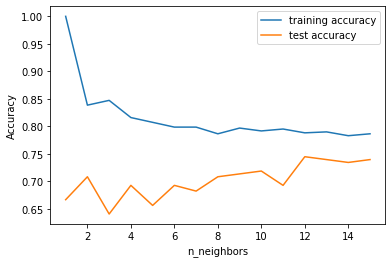

In [6]:
from matplotlib import pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1, 16)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))


plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")

plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")

plt.legend()
# plt.savefig('knn_compare_model')

In [18]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.74


In [7]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,13,129,0,30,0,39.9,0.569,44
73,4,129,86,20,270,35.1,0.231,23
352,3,61,82,28,0,34.4,0.243,46
497,2,81,72,15,76,30.1,0.547,25
145,0,102,75,23,0,0.0,0.572,21
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [8]:
ans = knn.predict([[10, 1200, 800, 400, 175, 135, 0.9, 49]])

In [9]:
if ans == 0:
    print('NO')
else:
    print("YES")

YES


In [15]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.6f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.6f}".format(logreg.score(X_test, y_test)))

Training set score: 0.784722
Test set score: 0.729167


In [24]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set accuracy: 0.700
Test set accuracy: 0.703


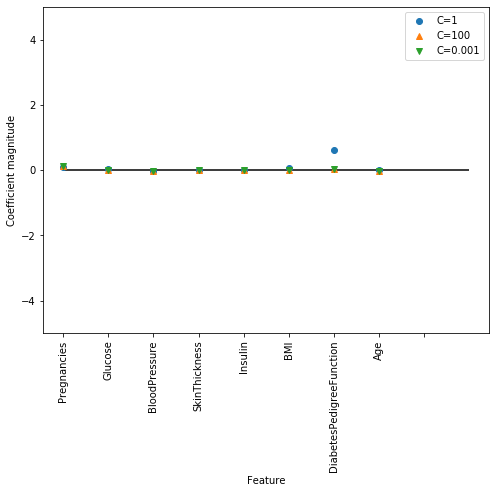

In [26]:
diabetes_features = [x for i,x in enumerate(diabetes.columns) if i!=8]
plt.figure(figsize=(8,6))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(diabetes.shape[1]), diabetes_features, rotation=90)
plt.hlines(0, 0, diabetes.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

In [22]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.7f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.7f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.0000000
Accuracy on test set: 0.6875000


In [21]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.9f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.9f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.772569444
Accuracy on test set: 0.713541667


In [25]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.64


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.77
Accuracy on test set: 0.77


In [27]:
svc = SVC(C=100)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.797
Accuracy on test set: 0.740


In [28]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.76
Accuracy on test set: 0.69


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.9f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.9f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.828125000
Accuracy on test set: 0.750000000


In [8]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

NameError: name 'MLPClassifier' is not defined

In [7]:
# plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

NameError: name 'mlp' is not defined